In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
def zt_sample_size(p_control, lift, alpha, power):
    p_test = p_control * lift
    
    h = 2 * math.asin(np.sqrt(p_control)) - 2 * math.asin(np.sqrt(p_test))
    
    nobs = smp.zt_ind_solve_power(effect_size = h, alpha = alpha, power = power, alternative='two-sided')
    
    return math.ceil(nobs)

In [3]:
alpha = 0.05
power = 0.8
p_control = 0.1
lift = 1.15

sample_size = zt_sample_size(p_control, lift, alpha, power)
print('Sample size for each variat:', sample_size)

Sample size for each variat: 6687


In [4]:
df = pd.read_csv('hw3.csv', sep=';', decimal=',', index_col=0)

In [5]:
df['invert_p_value'] = 1 - df['p_value']

In [6]:
df

,date,p_value,lift,users,invert_p_value
1,2020-02-01,0.40515,0.214387,731,0.59485
2,2020-02-02,0.31880,0.183620,1461,0.68120
3,2020-02-03,0.55553,0.082944,2285,0.44447
4,2020-02-04,0.52978,0.075370,3068,0.47022
5,2020-02-05,0.93192,0.012945,3909,0.06808
6,2020-02-06,0.65626,0.042951,4694,0.34374
7,2020-02-07,0.14631,0.123388,5476,0.85369
8,2020-02-08,0.27433,0.084926,6280,0.72567
9,2020-02-09,0.17989,0.097907,7090,0.82011
10,2020-02-10,0.24195,0.080293,7899,0.75805


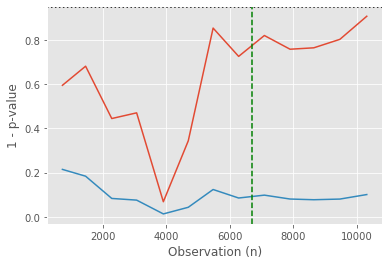

In [7]:
viz = sns.lineplot(x="users", y="invert_p_value", data=df)
sns.lineplot(x="users", y="lift", data=df)
viz.set_xlabel("Observation (n)")
viz.set_ylabel("1 - p-value")
viz.axhline(y=1-alpha, color="black", linestyle=":")
viz.axvline(sample_size, 0, 1, color="green", linestyle="--")
plt.show()

In [8]:
# не очень понятно, как, исходя из effect_size, рассчитанному по последнему дню эксперимента,
# получить mde, который мы смогли бы обнаружить на последний день проведения эксперимента

effect_size = smp.zt_ind_solve_power(
    alpha = alpha,
    power = power,
    nobs1 = df.tail(1)["users"],
    alternative='two-sided'
)

effect_size

0.03900949108784965

In [9]:
# mde на последний день проведения эксперимента
#(полученный sample_size равен кол-ву наблюдений в тестовой группе)

zt_sample_size(p_control, 1.12, alpha, power)

10323

In [10]:
# какое кол-во пользователей необходимо набрать в каждую группу для наблюдения mde=10%
# 10% -- lift последнего дня проведения теста

zt_sample_size(p_control, 1.10, alpha, power)

14745